#Ajustando


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
interrupcoes = pd.read_csv('InterrupcoesZS2023.csv')

In [3]:
interrupcoes

,DscConjuntoUnidadeConsumidora,DatInicioInterrupcao,DatFimInterrupcao,Mês,Dia,Dia da Semana
0,RIO BONITO,2023-01-01 18:48:27,2023-01-01 20:58:45,1,1,6
1,PARQUE DOS LAGOS,2023-01-22 17:55:50,2023-01-22 19:20:00,1,22,6
2,SAÚDE,2023-03-05 15:38:03,2023-03-05 17:45:43,3,5,6
3,MONTE AZUL,2023-05-02 17:03:31,2023-05-02 19:56:49,5,2,1
4,VARGINHA,2023-06-08 17:05:56,2023-06-08 20:00:11,6,8,3
...,...,...,...,...,...,...
71961,MORUMBI,2023-12-26 09:14:32,2023-12-27 00:35:49,12,26,1
71962,MONÇÕES,2023-12-26 09:14:48,2023-12-26 16:50:53,12,26,1
71963,VARGINHA,2023-12-26 09:57:48,2023-12-26 12:35:17,12,26,1
71964,GUMERCINDO,2023-12-26 09:07:41,2023-12-27 02:46:40,12,26,1


In [4]:
pluviometria = pd.read_csv('PluviometriaCGESPZonaSul2023.csv')

In [5]:
pluviometria

,Cód. Bairros,Nome Bairros,Dia,Mês,Pluviometria
0,MB,M Boi Mirim,1,1,1.1
1,CL,Campo Limpo,1,1,2.0
2,CS,Capela do Socorro,1,1,0.3
3,IP,Ipiranga,1,1,0.0
4,JA,Jabaquara,1,1,0.1
...,...,...,...,...,...
3280,JA,Jabaquara,31,12,0.0
3281,SA,Santo Amaro,31,12,0.0
3282,VM,Vila Mariana,31,12,0.0
3283,PA,Parelheiros,31,12,0.0


In [6]:
relaciona = pd.read_csv('RelacionaRegioes.csv')

In [7]:
relaciona

,Região ANEEL,Subprefeitura
0,RIO BONITO,Capela do Socorro
1,PARQUE DOS LAGOS,Capela do Socorro
2,SAÚDE,Vila Mariana
3,MONTE AZUL,M'Boi Mirim
4,VARGINHA,Capela do Socorro
5,SABARÁ,Santo Amaro
6,EMBU,Campo Limpo
7,CUPECÊ,Cidade Ademar
8,CLEMENTINO,Vila Mariana
9,GUMERCINDO,Vila Mariana


In [8]:
dict_relaciona = dict(zip(relaciona['Região ANEEL'],relaciona['Subprefeitura']))

In [9]:
dict_relaciona

{'RIO BONITO': 'Capela do Socorro',
 'PARQUE DOS LAGOS': 'Capela do Socorro',
 'SAÚDE': 'Vila Mariana',
 'MONTE AZUL': "M'Boi Mirim",
 'VARGINHA': 'Capela do Socorro',
 'SABARÁ': 'Santo Amaro',
 'EMBU': 'Campo Limpo',
 'CUPECÊ': 'Cidade Ademar',
 'CLEMENTINO': 'Vila Mariana',
 'GUMERCINDO': 'Vila Mariana',
 'MORUMBI': 'Campo Limpo',
 'PARELHEIROS': 'Parelheiros',
 'GERMÂNIA': 'Campo Limpo',
 'ALVARENGA': 'Cidade Ademar',
 'CONGONHAS': 'Santo Amaro',
 'GUARAPIRANGA': "M'Boi Mirim",
 'JOÃO CLÍMACO': 'Ipiranga',
 'MONÇÕES': 'Santo Amaro',
 'PLANALTO PAULISTA': 'Vila Mariana',
 'CANAÃ': 'Jabaquara',
 'AMERICANÓPOLIS': 'Jabaquara',
 'BANDEIRANTES': 'Vila Mariana',
 'ALTO DA BOA VISTA': 'Santo Amaro',
 'JUSCELINO KUBITSCHEK': 'Vila Mariana',
 'GRANJA JULIETA': 'Santo Amaro',
 'JD. DA GLÓRIA': 'Vila Mariana',
 'SANTO AMARO': 'Santo Amaro',
 'SACOMÃ': 'Ipiranga',
 'VILA MARIANA': 'Vila Mariana',
 'VILA ALMEIDA': 'Santo Amaro',
 'IBIRAPUERA': 'Vila Mariana',
 'MONUMENTO': 'Ipiranga'}

In [10]:
interrupcoes['Subprefeitura'] = interrupcoes['DscConjuntoUnidadeConsumidora'].map(dict_relaciona)

In [11]:
interrupcoes_por_dia = interrupcoes.groupby(['Mês','Dia','Subprefeitura']).size().to_frame('Interrupções').reset_index()

In [12]:
interrupcoes_por_dia

,Mês,Dia,Subprefeitura,Interrupções
0,1,1,Campo Limpo,14
1,1,1,Capela do Socorro,14
2,1,1,Cidade Ademar,21
3,1,1,Ipiranga,3
4,1,1,Jabaquara,6
...,...,...,...,...
3280,12,31,Jabaquara,7
3281,12,31,M'Boi Mirim,17
3282,12,31,Parelheiros,13
3283,12,31,Santo Amaro,18


In [13]:
interrupcoes['Subprefeitura'].unique()

array(['Capela do Socorro', 'Vila Mariana', "M'Boi Mirim", 'Santo Amaro',
       'Campo Limpo', 'Cidade Ademar', 'Parelheiros', 'Ipiranga',
       'Jabaquara'], dtype=object)

In [14]:
join = pluviometria
join['Subprefeitura'] = join['Nome Bairros']
join = join[['Mês','Dia','Subprefeitura','Pluviometria']]
join['Interrupções'] = interrupcoes_por_dia['Interrupções']
join

<ipython-input-14-451a1c1ea98a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  join['Interrupções'] = interrupcoes_por_dia['Interrupções']


,Mês,Dia,Subprefeitura,Pluviometria,Interrupções
0,1,1,M Boi Mirim,1.1,14
1,1,1,Campo Limpo,2.0,14
2,1,1,Capela do Socorro,0.3,21
3,1,1,Ipiranga,0.0,3
4,1,1,Jabaquara,0.1,6
...,...,...,...,...,...
3280,12,31,Jabaquara,0.0,7
3281,12,31,Santo Amaro,0.0,17
3282,12,31,Vila Mariana,0.0,13
3283,12,31,Parelheiros,0.0,18


In [15]:
joinagg = join.groupby(['Mês','Dia']).agg(Pluviometria = pd.NamedAgg('Pluviometria','sum'),
                                          Interrupções = pd.NamedAgg('Interrupções','sum')).reset_index()

In [16]:
joinagg

,Mês,Dia,Pluviometria,Interrupções
0,1,1,4.2,93
1,1,2,14.1,190
2,1,3,82.4,184
3,1,4,256.4,200
4,1,5,97.9,192
...,...,...,...,...
360,12,27,0.0,225
361,12,28,0.0,205
362,12,29,0.0,246
363,12,30,73.6,225


#Análise Exploratória

Text(0, 0.5, 'Interrupções')

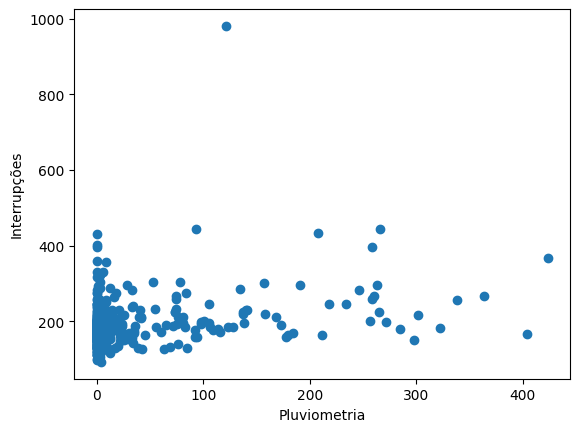

In [25]:
plt.scatter(joinagg['Pluviometria'],joinagg['Interrupções'])
plt.xlabel('Pluviometria')
plt.ylabel('Interrupções')

In [71]:
ComChuva = joinagg[joinagg['Pluviometria'] > 0]

Text(0.5, 1.0, 'Pluviometria Positiva')

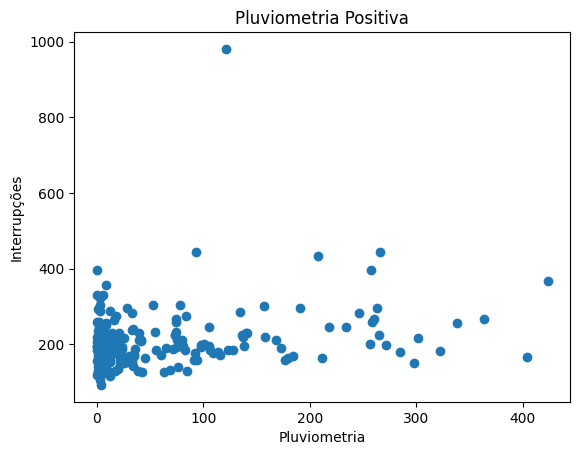

In [44]:
plt.scatter(ComChuva['Pluviometria'],ComChuva['Interrupções'])
plt.xlabel('Pluviometria')
plt.ylabel('Interrupções')
plt.title('Pluviometria Positiva')

In [70]:
SemChuva = joinagg[joinagg['Pluviometria'] == 0]

In [69]:
comparandointerrupcoes = pd.DataFrame()
comparandointerrupcoes['Sem Chuva'] = SemChuva['Interrupções'].describe().to_frame()['Interrupções']
comparandointerrupcoes['Com Chuva'] = ComChuva['Interrupções'].describe().to_frame()['Interrupções']
comparandointerrupcoes

,Sem Chuva,Com Chuva
count,161.000000,204.000000
mean,179.354037,211.225490
std,47.060122,80.767489
min,97.000000,93.000000
25%,152.000000,169.000000
50%,174.000000,195.000000
75%,197.000000,230.250000
max,430.000000,981.000000


#Modelando

In [17]:
import statsmodels.api as sm

In [18]:
modelo = sm.OLS.from_formula('Interrupções ~ Pluviometria', joinagg).fit()

In [19]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Interrupções   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     30.36
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           6.82e-08
Time:                        17:01:56   Log-Likelihood:                -2052.1
No. Observations:                 365   AIC:                             4108.
Df Residuals:                     363   BIC:                             4116.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      187.8221      3.899     48.168      0.000     180.154     195.490
Pluviometria     0.2624      0.048      5.510      0.000       0.169       0.356
==============================================================================
Omnibus:                      406.480   Durbin-Watson:                   1.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33109.232
Skew:                           4.738   Prob(JB):                         0.00
Kurtosis:                      48.687   Cond. No.                         90.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
for subpref in join['Subprefeitura'].unique():
  df = join[join['Subprefeitura'] == subpref]
  modelo = sm.OLS.from_formula('Interrupções ~ Pluviometria', df).fit()
  print('\nModelo', subpref)
  #print(modelo.params)
  print('R-squared:', round(modelo.rsquared,3), '\n')


Modelo M Boi Mirim
R-squared: 0.006 


Modelo Campo Limpo
R-squared: 0.013 


Modelo Capela do Socorro
R-squared: 0.037 


Modelo Ipiranga
R-squared: 0.033 


Modelo Jabaquara
R-squared: 0.088 


Modelo Santo Amaro
R-squared: 0.015 


Modelo Vila Mariana
R-squared: 0.032 


Modelo Parelheiros 
R-squared: 0.037 


Modelo Cidade Ademar
R-squared: 0.045 

